<h2 style='color:black' align='center'>Implementation of stochastic grandient descent in python</h2>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price", axis = "columns"))

In [5]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

In [7]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_gradient = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_gradient = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_gradient
        b = b- learning_rate * b_gradient
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70929391, 0.67331122]), -0.22841473002215187, 0.004237360896128228)

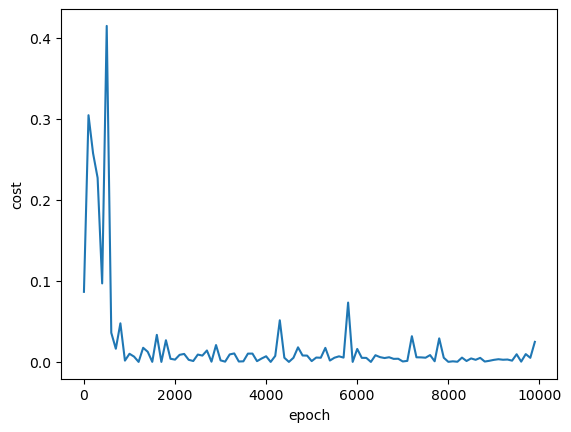

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [10]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [11]:
predict(2600,4,w_sgd,b_sgd)

128.77071040070186